In [1]:
import pandas as pd

In [3]:
df = pd.read_excel('Customer Information.xlsx')

In [4]:
df.head()

,Warehouse,Factory,Customer Code,Customer Name,HR Code,Maritial Status,Number of Family Member,Address,Contact Number,Email,Gender,NID Number,Date of Birth,Department,Designation,Joining Date,Gross Salary,Credit Limit,Is Active
0,Continental Garments Ind. (Pvt.) Ltd.,Continental Garments Ind. (Pvt.) Ltd.,AP0200509209,OSMAN,00000006,0,1,"8, Dewan Idris Road, Boro Rangamatia, Ashulia,...",01620176619,NaN,NaN,NaN,06/10/1986,ADMIN,Canteen Boy,01/01/2000,20000.0,0.0,Active
1,Continental Garments Ind. (Pvt.) Ltd.,Continental Garments Ind. (Pvt.) Ltd.,AP0200509084,NABIR HOSSAIN,00000007,0,1,"8, Dewan Idris Road, Boro Rangamatia, Ashulia,...",01732194277,NaN,NaN,NaN,13/04/1981,MAINTENANCE,Store Keeper,01/01/2000,21500.0,0.0,Active
2,Saturn Textiles Ltd.,Saturn Textiles Ltd.,AP0150034948,Mr. Amanullah Chagla,0000001,0,1,Gazipura,NaN,NaN,Male,NaN,05/05/1986,Management,Managing Director,01/01/2000,0.0,5000.0,Active
3,Saturn Textiles Ltd.,Saturn Textiles Ltd.,AP0150034949,Mr. Raju Seshadri,0000002,0,1,Gazipura,NaN,NaN,Male,NaN,05/05/1986,Management,Executive Director (Saturn Textiles Ltd),01/01/2000,0.0,5000.0,Active
4,Continental Garments Ind. (Pvt.) Ltd.,Continental Garments Ind. (Pvt.) Ltd.,AP0200509820,SHANTI RANI,00000025,0,1,"8, Dewan Idris Road, Boro Rangamatia, Ashulia,...",01922023811,NaN,NaN,NaN,05/01/1976,ADMIN,Cleaner,01/01/2000,12800.0,0.0,Active


In [7]:
df2 = pd.read_excel('partner_last6.xlsx')
df2.head()

,strBusinessPartnerCode,sales,strWarehouseName,Month
0,AP0180000272,98.0,Green Smart Shirts Ltd.,July
1,AP0180000289,155.0,Green Smart Shirts Ltd.,July
2,AP0180000321,231.0,Green Smart Shirts Ltd.,July
3,AP0180000411,2639.0,Green Smart Shirts Ltd.,July
4,AP0180000461,712.0,Green Smart Shirts Ltd.,July


In [9]:
# Select the columns to keep
columns_to_keep = [
    'Customer Code',
    'Maritial Status',
    'Gender',
    'Department',
    'Designation',
    'Joining Date',
    'Gross Salary',  # Adjusted from 'Salary' to 'Gross Salary' based on your df.info output
    'Credit Limit',
    'Is Active'
]

# Create a new DataFrame with only the selected columns
df11 = df[columns_to_keep]

# Display the filtered DataFrame
print(df11.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169061 entries, 0 to 169060
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Customer Code    169061 non-null  object 
 1   Maritial Status  169061 non-null  int64  
 2   Gender           142962 non-null  object 
 3   Department       151402 non-null  object 
 4   Designation      164934 non-null  object 
 5   Joining Date     169057 non-null  object 
 6   Gross Salary     169061 non-null  float64
 7   Credit Limit     169061 non-null  float64
 8   Is Active        169061 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 11.6+ MB
None


In [13]:
df11['State'] = df11['Customer Code'].isin(df2['strBusinessPartnerCode']).map({True: 'Tapped', False: 'Un Tapped'})

# Display the updated filtered_df
print(df11)

       Customer Code  Maritial Status Gender              Department  \
0       AP0200509209                0    NaN                   ADMIN   
1       AP0200509084                0    NaN             MAINTENANCE   
2       AP0150034948                0   Male              Management   
3       AP0150034949                0   Male              Management   
4       AP0200509820                0    NaN                   ADMIN   
...              ...              ...    ...                     ...   
169056  AP0230003685                5   Male    Non Management Staff   
169057  AP0230043295                5   Male    Non Management Staff   
169058  AP0230037086                5   Male  Maintenance Department   
169059  AP0230058497                5   Male    Non Management Staff   
169060  AP0230552541                5   Male    Non Management Staff   

                                     Designation Joining Date  Gross Salary  \
0                                    Canteen Boy   01/01

/var/folders/yc/0kxwlsj92ljd8238c98k3xj00000gn/T/ipykernel_22140/2848918369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['State'] = df11['Customer Code'].isin(df2['strBusinessPartnerCode']).map({True: 'Tapped', False: 'Un Tapped'})


In [15]:
# Convert 'Joining Date' to datetime, invalid parsing will be set as NaT
df11['Joining Date'] = pd.to_datetime(df11['Joining Date'], errors='coerce')

# Drop rows where 'Joining Date' is NaT
df11 = df11.dropna(subset=['Joining Date'])

# Calculate Tenure in months, using the average number of days in a month (30.44) for more accuracy
today = pd.Timestamp('now')
df11['Tenure'] = ((today - df11['Joining Date']) / pd.Timedelta(days=30.44))

# Convert Tenure to integer, handling any NaN values
df11['Tenure'] = df11['Tenure'].fillna(0).astype(int)

# Display the updated DataFrame
print(df11.head())


  Customer Code  Maritial Status Gender   Department  \
0  AP0200509209                0    NaN        ADMIN   
1  AP0200509084                0    NaN  MAINTENANCE   
2  AP0150034948                0   Male   Management   
3  AP0150034949                0   Male   Management   
4  AP0200509820                0    NaN        ADMIN   

                                Designation Joining Date  Gross Salary  \
0                               Canteen Boy   2000-01-01       20000.0   
1                              Store Keeper   2000-01-01       21500.0   
2                         Managing Director   2000-01-01           0.0   
3  Executive Director (Saturn Textiles Ltd)   2000-01-01           0.0   
4                                   Cleaner   2000-01-01       12800.0   

   Credit Limit Is Active      State  Tenure  
0           0.0    Active  Un Tapped     295  
1           0.0    Active  Un Tapped     295  
2        5000.0    Active     Tapped     295  
3        5000.0    Active  Un 

/var/folders/yc/0kxwlsj92ljd8238c98k3xj00000gn/T/ipykernel_22140/3586944599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['Joining Date'] = pd.to_datetime(df11['Joining Date'], errors='coerce')


In [17]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112980 entries, 0 to 169060
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Customer Code    112980 non-null  object        
 1   Maritial Status  112980 non-null  int64         
 2   Gender           94610 non-null   object        
 3   Department       101111 non-null  object        
 4   Designation      110320 non-null  object        
 5   Joining Date     112980 non-null  datetime64[ns]
 6   Gross Salary     112980 non-null  float64       
 7   Credit Limit     112980 non-null  float64       
 8   Is Active        112980 non-null  object        
 9   State            112980 non-null  object        
 10  Tenure           112980 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 10.3+ MB


In [19]:
def categorize_salary(salary):
    if 0 <= salary <= 12500:
        return '0 - 12.5k'
    elif 12501 <= salary <= 15000:
        return '12.5k - 15k'
    elif 15001 <= salary <= 18000:
        return '15k - 18k'
    elif 18001 <= salary <= 21000:
        return '18k - 21k'
    elif 21001 <= salary <= 30000:
        return '21k - 30k'
    else:
        return '30k+'

In [21]:
df11['Salary_seg'] = df11['Gross Salary'].apply(categorize_salary)


In [23]:
print(df11.head())


  Customer Code  Maritial Status Gender   Department  \
0  AP0200509209                0    NaN        ADMIN   
1  AP0200509084                0    NaN  MAINTENANCE   
2  AP0150034948                0   Male   Management   
3  AP0150034949                0   Male   Management   
4  AP0200509820                0    NaN        ADMIN   

                                Designation Joining Date  Gross Salary  \
0                               Canteen Boy   2000-01-01       20000.0   
1                              Store Keeper   2000-01-01       21500.0   
2                         Managing Director   2000-01-01           0.0   
3  Executive Director (Saturn Textiles Ltd)   2000-01-01           0.0   
4                                   Cleaner   2000-01-01       12800.0   

   Credit Limit Is Active      State  Tenure   Salary_seg  
0           0.0    Active  Un Tapped     295    18k - 21k  
1           0.0    Active  Un Tapped     295    21k - 30k  
2        5000.0    Active     Tapped  

In [25]:
import matplotlib.pyplot as plt


In [27]:
# Filter the DataFrame where State is 'Tapped'
df_tapped = df11[df11['State'] == 'Tapped']

In [29]:
# Get the count of each distinct Salary_seg value
salary_seg_counts = df_tapped['Salary_seg'].value_counts()


/var/folders/yc/0kxwlsj92ljd8238c98k3xj00000gn/T/ipykernel_22140/2550449926.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, salary_seg_counts[i], str(salary_seg_counts[i]), ha='center', va='bottom')


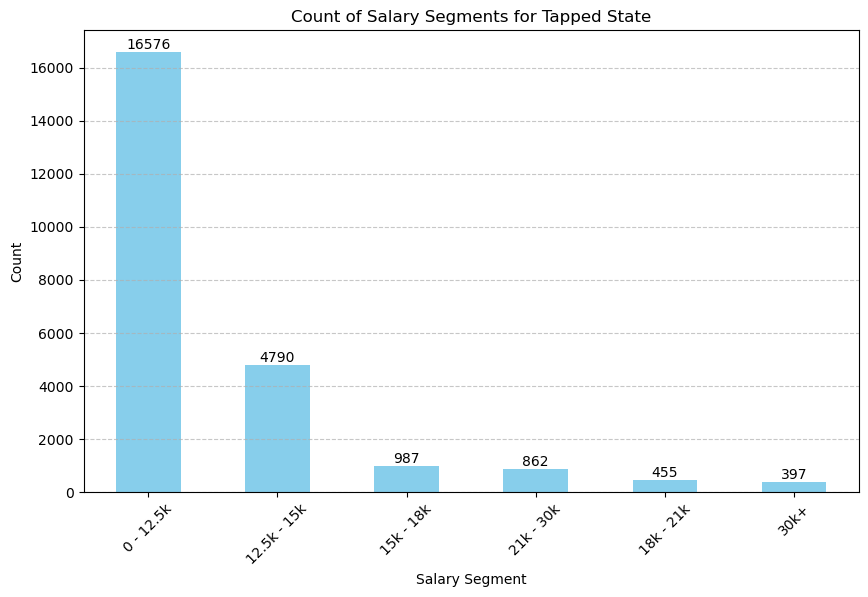

In [33]:
plt.figure(figsize=(10, 6))
bars = salary_seg_counts.plot(kind='bar', color='skyblue')

# Add labels on top of the bars
for i in range(len(salary_seg_counts)):
    plt.text(i, salary_seg_counts[i], str(salary_seg_counts[i]), ha='center', va='bottom')

plt.title('Count of Salary Segments for Tapped State')
plt.xlabel('Salary Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [39]:
def categorize_Tenure(Tenure):
    if 0 <= Tenure <= 6:
        return '0 - 6 Months'
    elif 7 <= Tenure <= 12:
        return '7 - 12 Months'
    elif 13 <= Tenure <= 48:
        return '13 - 48 Months'
    elif 49 <= Tenure <= 60:
        return '49 - 60 Months'
    else:
        return '60+ Months'

In [41]:
df11['Tenure_seg'] = df11['Tenure'].apply(categorize_Tenure)


In [43]:
print(df11.head())


  Customer Code  Maritial Status Gender   Department  \
0  AP0200509209                0    NaN        ADMIN   
1  AP0200509084                0    NaN  MAINTENANCE   
2  AP0150034948                0   Male   Management   
3  AP0150034949                0   Male   Management   
4  AP0200509820                0    NaN        ADMIN   

                                Designation Joining Date  Gross Salary  \
0                               Canteen Boy   2000-01-01       20000.0   
1                              Store Keeper   2000-01-01       21500.0   
2                         Managing Director   2000-01-01           0.0   
3  Executive Director (Saturn Textiles Ltd)   2000-01-01           0.0   
4                                   Cleaner   2000-01-01       12800.0   

   Credit Limit Is Active      State  Tenure   Salary_seg  Tenure_seg  
0           0.0    Active  Un Tapped     295    18k - 21k  60+ Months  
1           0.0    Active  Un Tapped     295    21k - 30k  60+ Months  
2 

In [47]:
# Filter the DataFrame where State is 'Tapped'
df_tapped = df11[df11['State'] == 'Tapped']

In [49]:
# Get the count of each distinct Salary_seg value
tenure_seg_counts = df_tapped['Tenure_seg'].value_counts()


/var/folders/yc/0kxwlsj92ljd8238c98k3xj00000gn/T/ipykernel_22140/259296449.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, tenure_seg_counts[i], str(tenure_seg_counts[i]), ha='center', va='bottom')


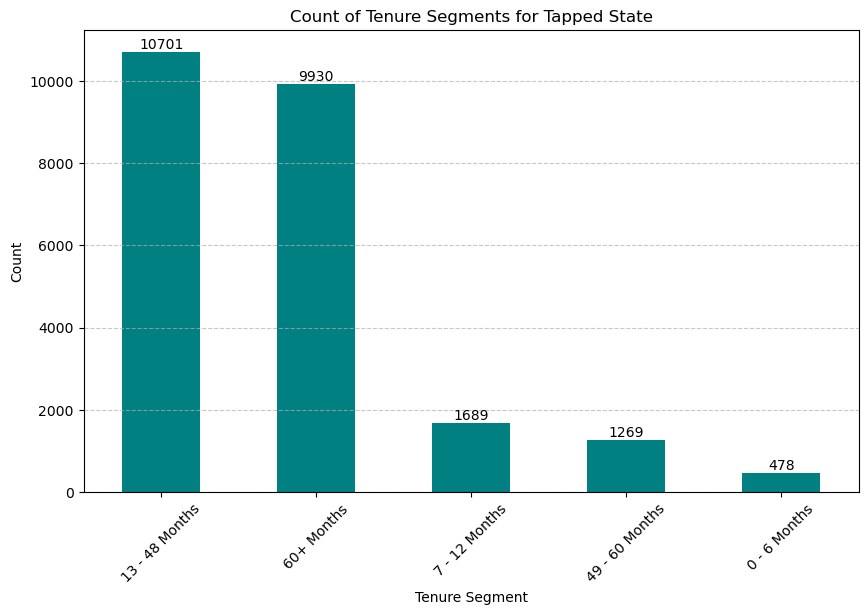

In [65]:
plt.figure(figsize=(10, 6))
bars = tenure_seg_counts.plot(kind='bar', color='teal')

# Add labels on top of the bars
for i in range(len(tenure_seg_counts)):
    plt.text(i, tenure_seg_counts[i], str(tenure_seg_counts[i]), ha='center', va='bottom')

plt.title('Count of Tenure Segments for Tapped State')
plt.xlabel('Tenure Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [67]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112980 entries, 0 to 169060
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Customer Code    112980 non-null  object        
 1   Maritial Status  112980 non-null  int64         
 2   Gender           94610 non-null   object        
 3   Department       101111 non-null  object        
 4   Designation      110320 non-null  object        
 5   Joining Date     112980 non-null  datetime64[ns]
 6   Gross Salary     112980 non-null  float64       
 7   Credit Limit     112980 non-null  float64       
 8   Is Active        112980 non-null  object        
 9   State            112980 non-null  object        
 10  Tenure           112980 non-null  int64         
 11  Salary_seg       112980 non-null  object        
 12  Tenure_seg       112980 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 12.1+ MB


In [69]:
df11.head()

,Customer Code,Maritial Status,Gender,Department,Designation,Joining Date,Gross Salary,Credit Limit,Is Active,State,Tenure,Salary_seg,Tenure_seg
0,AP0200509209,0,NaN,ADMIN,Canteen Boy,2000-01-01,20000.0,0.0,Active,Un Tapped,295,18k - 21k,60+ Months
1,AP0200509084,0,NaN,MAINTENANCE,Store Keeper,2000-01-01,21500.0,0.0,Active,Un Tapped,295,21k - 30k,60+ Months
2,AP0150034948,0,Male,Management,Managing Director,2000-01-01,0.0,5000.0,Active,Tapped,295,0 - 12.5k,60+ Months
3,AP0150034949,0,Male,Management,Executive Director (Saturn Textiles Ltd),2000-01-01,0.0,5000.0,Active,Un Tapped,295,0 - 12.5k,60+ Months
4,AP0200509820,0,NaN,ADMIN,Cleaner,2000-01-01,12800.0,0.0,Active,Un Tapped,295,12.5k - 15k,60+ Months


In [75]:
# Filter the DataFrame based on the given conditions
filtered_df = df11[
    (df11['State'] == 'Un Tapped') & 
    (df11['Salary_seg'] == '0 - 12.5k') & 
    (df11['Tenure_seg'] == '13 - 48 Months')
]

# Display the filtered DataFrame
filtered_df.head()


,Customer Code,Maritial Status,Gender,Department,Designation,Joining Date,Gross Salary,Credit Limit,Is Active,State,Tenure,Salary_seg,Tenure_seg
878,AP0290019551,0,Female,Finishing,Poly Man,2020-10-02,9347.0,0.0,Active,Un Tapped,46,0 - 12.5k,13 - 48 Months
879,AP0290019552,0,Female,Quality,Sr.Quality Inspector,2020-08-02,11106.0,0.0,Active,Un Tapped,48,0 - 12.5k,13 - 48 Months
880,AP0290032343,0,Male,Sewing,Gen.Sew.M.Operator,2020-12-02,8970.0,0.0,Active,Un Tapped,44,0 - 12.5k,13 - 48 Months
882,AP0290039726,0,Female,Administration,Cleaner,2020-12-02,9404.0,0.0,Active,Un Tapped,44,0 - 12.5k,13 - 48 Months
894,AP0290040890,0,Male,Sample,Sr. Sample Man,2020-12-08,11387.0,0.0,Active,Un Tapped,44,0 - 12.5k,13 - 48 Months


In [79]:
!pip install matplotlib-venn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 290.6 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45289 sha256=a9e05b6d18a5d60f9ae87e4c1889e80b38df6a03ae9f78339db54daa6511f77f
  Stored in directory: /Users/risadsbrain/Library/Caches/pip/wheels/8a/29/52/4d90d9556445079f88255b87a75d951357eff52d0795b88f4f
Successfully built matplotlib-venn


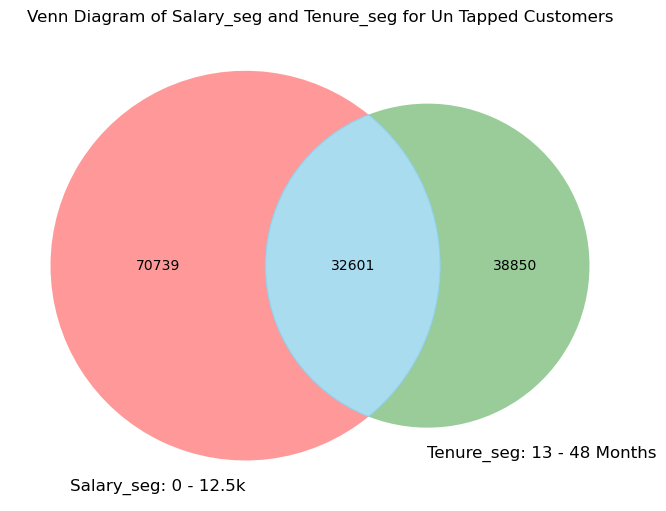

In [81]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Filter the DataFrame for the 'Un Tapped' state
df_untapped = df11[df11['State'] == 'Un Tapped']

# Count the occurrences in Salary_seg and Tenure_seg
salary_seg_count = df_untapped['Salary_seg'].value_counts()
tenure_seg_count = df_untapped['Tenure_seg'].value_counts()

# Count the number of customers that fall into both categories of interest
both_count = df_untapped[
    (df_untapped['Salary_seg'] == '0 - 12.5k') & 
    (df_untapped['Tenure_seg'] == '13 - 48 Months')
].shape[0]

# Create the Venn diagram
plt.figure(figsize=(8, 8))

venn = venn2(
    subsets=(
        salary_seg_count['0 - 12.5k'],  # Only in Salary_seg '0 - 12.5k'
        tenure_seg_count['13 - 48 Months'],  # Only in Tenure_seg '13 - 48 Months'
        both_count  # In both
    ),
    set_labels=('Salary_seg: 0 - 12.5k', 'Tenure_seg: 13 - 48 Months')
)

# Customize the Venn diagram to highlight the overlap
venn.get_label_by_id('11').set_text(both_count)  # Show the count in the overlap section
venn.get_patch_by_id('11').set_color('skyblue')  # Change the color of the overlap
venn.get_patch_by_id('11').set_alpha(0.7)  # Adjust transparency for the overlap

plt.title('Venn Diagram of Salary_seg and Tenure_seg for Un Tapped Customers')
plt.show()


In [85]:
filtered_df.head()

,Customer Code,Maritial Status,Gender,Department,Designation,Joining Date,Gross Salary,Credit Limit,Is Active,State,Tenure,Salary_seg,Tenure_seg
878,AP0290019551,0,Female,Finishing,Poly Man,2020-10-02,9347.0,0.0,Active,Un Tapped,46,0 - 12.5k,13 - 48 Months
879,AP0290019552,0,Female,Quality,Sr.Quality Inspector,2020-08-02,11106.0,0.0,Active,Un Tapped,48,0 - 12.5k,13 - 48 Months
880,AP0290032343,0,Male,Sewing,Gen.Sew.M.Operator,2020-12-02,8970.0,0.0,Active,Un Tapped,44,0 - 12.5k,13 - 48 Months
882,AP0290039726,0,Female,Administration,Cleaner,2020-12-02,9404.0,0.0,Active,Un Tapped,44,0 - 12.5k,13 - 48 Months
894,AP0290040890,0,Male,Sample,Sr. Sample Man,2020-12-08,11387.0,0.0,Active,Un Tapped,44,0 - 12.5k,13 - 48 Months


In [87]:
# Export the merged DataFrame to an Excel file
filtered_df.to_excel('Focused Group.xlsx', index=False)

print("Data exported to Focused Group.xlsx successfully!")


Data exported to Focused Group.xlsx successfully!
